In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

from keras.utils import plot_model

# DFANN

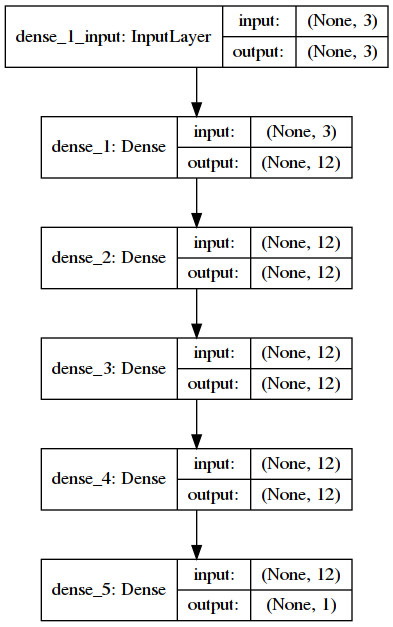

In [2]:
neuron_number = 12 # 12 neurons in each Dense layer
i_data_dim = 3 # 3 GIFs as input

model_DFANN = Sequential()
model_DFANN.add(Dense(neuron_number, activation='relu', input_dim=i_data_dim))
model_DFANN.add(Dense(neuron_number, activation='relu'))
model_DFANN.add(Dense(neuron_number, activation='relu'))
model_DFANN.add(Dense(neuron_number, activation='relu'))
model_DFANN.add(Dense(1, activation='relu'))

model_DFANN.compile(loss='mean_squared_error',
              optimizer='nadam',
              metrics=['accuracy'])

plot_model(model_DFANN, to_file='model_DFANN.png', show_shapes=True)

# LSTM

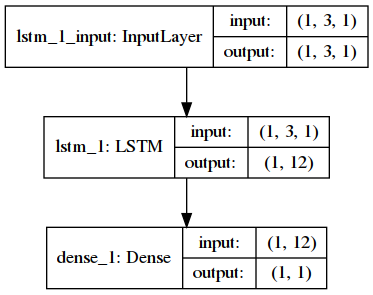

In [2]:
cell_number = 12 # 12 cells in LSTM layer
batch_size = 1 
timesteps = 3 # 3 GIFs for each time series
data_dim = 1 # 1 GIF as data

model_LSTM = Sequential()
model_LSTM.add(LSTM(cell_number, activation='tanh', batch_input_shape=(batch_size,timesteps,data_dim), stateful=True))
model_LSTM.add(Dense(1, activation='relu'))

model_LSTM.compile(loss='mean_squared_error',
              optimizer='nadam',
              metrics=['accuracy'])

plot_model(model_LSTM, to_file='model_LSTM.png', show_shapes=True)